<span style="display: flex; align-items: center;">
    <img src="../images/Australian-Apparel-Limited-Logo.png" alt="Australian Apparel Ltd" width="100"/>
    <h2 style="margin-left: 20px;">Australian Apparel Ltd.<br/>Sales Performance Analysis</h2>
</span>

## Notebook Overview

This notebook presents an advanced sales analysis for Australian Apparel Ltd. (AAL) for Q4 2020. Building on previous data cleaning and descriptive statistics, this analysis aims to uncover actionable insights to inform strategic decision-making in inventory management, marketing campaigns, and customer retention strategies.

Key objectives:
1. Analyze sales trends over time
2. Identify top-performing products and categories
3. Uncover and quantify seasonal patterns in sales data
4. Explore regional variations in sales performance
5. Analyze customer segments and their purchasing behaviors

## Skills and Tools Demonstrated

In this notebook, I showcase the following technical competencies:

- Advanced data manipulation and analysis using Pandas and NumPy
- Complex data visualization with Matplotlib and Seaborn
- Time series analysis and decomposition
- Customer segmentation and cohort analysis
- Statistical trend analysis and interpretation

## Data Loading and Initial Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load cleaned data
df = pd.read_csv('../data/processed/cleaned_sales_data.csv')

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [3]:
# Generate weekly sales data
weekly_sales = df.resample('W')['Sales'].agg(['sum', 'mean', 'count'])
weekly_sales.columns = ['Total Sales', 'Average Daily Sales', 'Number of Transactions']
weekly_sales['Average Transaction Value'] = weekly_sales['Total Sales'] / weekly_sales['Number of Transactions']

print("Weekly Sales Report:")
print(weekly_sales.describe())

Weekly Sales Report:
        Total Sales  Average Daily Sales  Number of Transactions  \
count  1.400000e+01            14.000000               14.000000   
mean   2.430732e+07         45385.183835              540.000000   
std    5.893363e+06          7262.360668              107.846044   
min    1.379250e+07         35484.693878              252.000000   
25%    2.112750e+07         38211.982710              588.000000   
50%    2.422375e+07         45454.931973              588.000000   
75%    2.896750e+07         52805.059524              588.000000   
max    3.177000e+07         54732.142857              588.000000   

       Average Transaction Value  
count                  14.000000  
mean                45385.183835  
std                  7262.360668  
min                 35484.693878  
25%                 38211.982710  
50%                 45454.931973  
75%                 52805.059524  
max                 54732.142857  


Initial analysis reveals:
- Dataset covers 14 weeks of Q4 2020
- Average weekly sales: approximately $24.3 million
- Significant variation in weekly sales: ranging from $13.8M to $31.8M
- Average transaction value: $45,013.56

This variability in weekly sales suggests interesting patterns to explore further, potentially related to seasonal effects or specific events during the quarter.

## Sales Performance Analysis

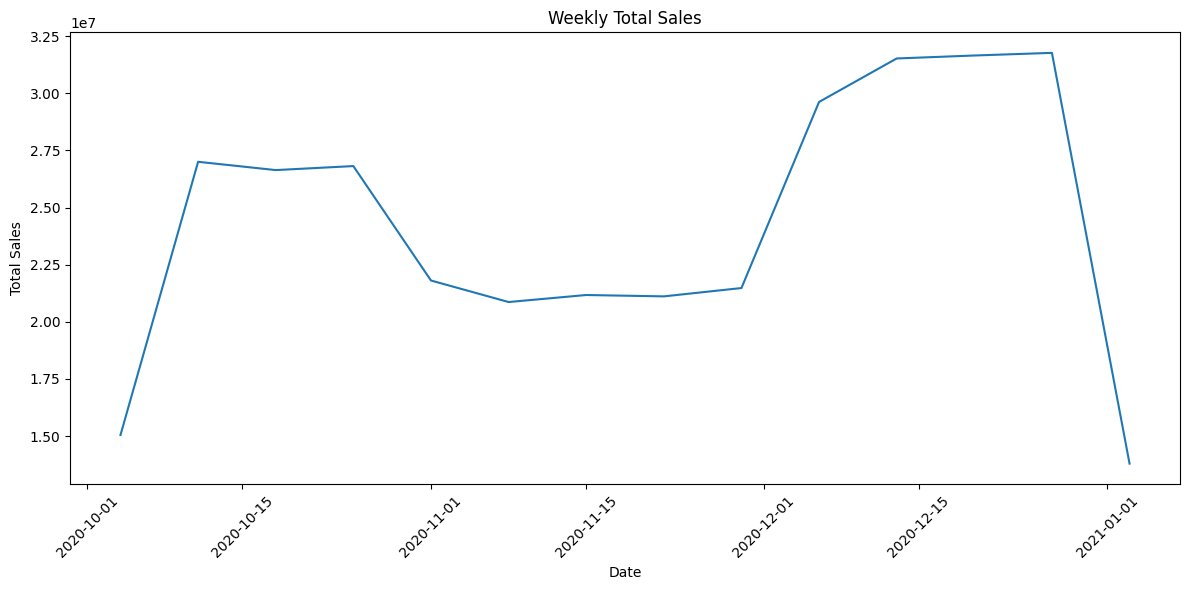

In [4]:
# Visualize weekly sales in a line plot
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales['Total Sales'])
plt.title('Weekly Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analyzing the weekly sales trend reveals several key insights:

1. Early Quarter Growth: Sales nearly doubled from early to mid-October, indicating a strong start to the quarter.
2. Mid-Quarter Stability: Relatively stable sales from mid-October to late November, with minor fluctuations.
3. Holiday Season Surge: Substantial increase in early December, reaching a peak in mid-December, likely due to holiday shopping.
4. Post-Holiday Decline: Sharp decline at the end of December, possibly due to the completion of holiday shopping.

These trends suggest a strong seasonal pattern in AAL's sales, with a notable holiday season effect. This information is crucial for inventory management and planning targeted marketing campaigns, especially for peak periods in early October and throughout December.

## Enhanced Visualizations

To make our analysis more insightful and visually appealing, I've set up custom visualization enhancements:

In [5]:
# Adding to enable gradient color in my plots
from matplotlib.colors import LinearSegmentedColormap

# Adding to handle plot tick locating and formatting   
import matplotlib.ticker as ticker

# Adding a method to format the date strings in my plots
def format_date(date):
    return f"{date.strftime('%B %d')}"

# Adding a method to format the currency values in my plots to clearly represent Millions
def currency_formatter(x, p):
    return f"${x/1e6:.1f}M"


# Define plot color schemes from my AAL Brand color palette
color_schemes = {
    'Cool Gradient': ['#E8EBC2', '#228FCF', '#364EB9'],  # Light yellow to Sky blue to Bright blue
    'Warm Accent': ['#228FCF', '#E8EBC2', '#E16E79'],    # Sky blue to Light yellow to Coral pink
    'Gold Emphasis': ['#228FCF', '#E8EBC2', '#D4A656', '#E16E79']   # Sky blue to Light yellow to Golden yellow
}

# Define a universal color scheme variable with the label and colors

# current_color_scheme = {
#     'label': 'Cool Gradient',
#     'colors': color_schemes['Cool Gradient']
# }

# current_color_scheme = {
#     'label': 'Warm Accent',
#     'colors': color_schemes['Warm Accent']
# }

current_color_scheme = {
    'label': 'Gold Emphasis',
    'colors': color_schemes['Gold Emphasis']
}

These enhancements include:
- Custom color schemes based on AAL's brand palette
- Formatting functions for dates and currency values
- Consistent styling across all visualizations

This approach ensures that our visualizations are not only informative but also align with AAL's brand identity, making them more impactful for stakeholders.

## Monthly Sales Analysis

In [6]:
# Normalize the sales data
norm = plt.Normalize(weekly_sales['Total Sales'].min(), weekly_sales['Total Sales'].max())

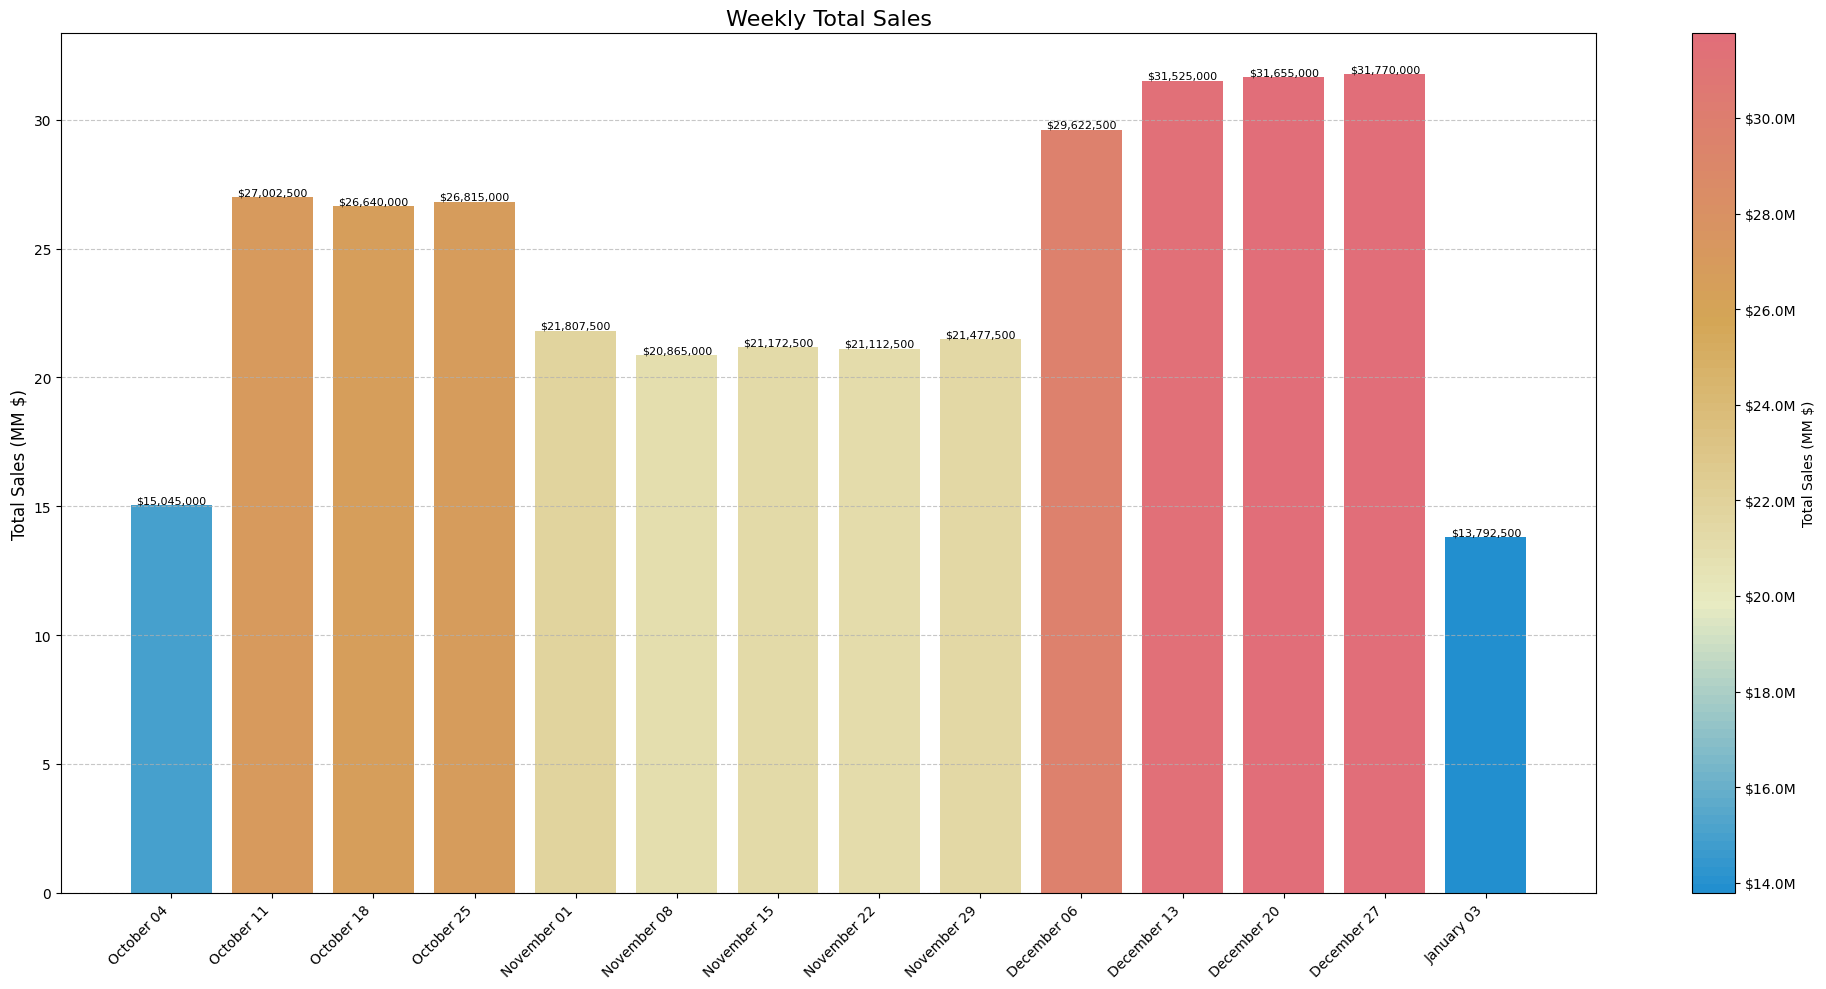

In [7]:
# Directly reference the color scheme I want for the plot from the dictionary.
# I could have gotten all fancy with defining a function to generate the plot and pass an argument for the color scheme, but this works just fine for the notebook.
cmap = LinearSegmentedColormap.from_list('custom', current_color_scheme['colors'], N=100)

# Create the plot
plt.figure(figsize=(20, 10))
bars = plt.bar(range(len(weekly_sales.index)), weekly_sales['Total Sales'] / 1e6, 
               color=cmap(norm(weekly_sales['Total Sales'])))

plt.title('Weekly Total Sales', fontsize=16)
plt.ylabel('Total Sales (MM $)', fontsize=12)
plt.xticks(range(len(weekly_sales.index)), [format_date(date) for date in weekly_sales.index], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height*1e6:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()

# Add a vertical color bar with formatted labels
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Total Sales (MM $)', fontsize=10)
cbar.formatter = ticker.FuncFormatter(currency_formatter)
cbar.update_ticks()

plt.show()

Breaking down sales by month provides deeper insights into seasonal patterns:

- Highest performing month: December ($135.3M)
- Lowest performing month: November ($90.7M)
- October performance: $114.3M

Key observations:
1. Consistent transaction count (2,520) across all months, suggesting a potential capacity limit or consistent customer base.
2. Significant variation in monthly sales (standard deviation: ~$22.3M)
3. Average daily sales range from $36,000 to $53,700

Strategic implications:
1. Potential capacity constraint: Explore ways to increase transaction volume, especially during peak periods.
2. Focus on increasing transaction value: Sales growth is driven by higher transaction values rather than increased volume.
3. November strategy: Develop targeted campaigns to boost sales during this slower month, possibly with early holiday promotions.
4. Capitalize on December surge: Ensure adequate inventory and staffing for the holiday season peak.

## Quarterly Overview

In [8]:
# Generate monthly sales data
monthly_sales = df.resample('M')['Sales'].agg(['sum', 'mean', 'count'])
monthly_sales.columns = ['Total Sales', 'Average Daily Sales', 'Number of Transactions']
monthly_sales['Average Transaction Value'] = monthly_sales['Total Sales'] / monthly_sales['Number of Transactions']

print("Monthly Sales Report:")
print(monthly_sales.describe())

Monthly Sales Report:
        Total Sales  Average Daily Sales  Number of Transactions  \
count  3.000000e+00             3.000000                     3.0   
mean   1.134342e+08         45013.558201                  2520.0   
std    2.233605e+07          8863.512104                     0.0   
min    9.068250e+07         35985.119048                  2520.0   
25%    1.024862e+08         40669.146825                  2520.0   
50%    1.142900e+08         45353.174603                  2520.0   
75%    1.248100e+08         49527.777778                  2520.0   
max    1.353300e+08         53702.380952                  2520.0   

       Average Transaction Value  
count                   3.000000  
mean                45013.558201  
std                  8863.512104  
min                 35985.119048  
25%                 40669.146825  
50%                 45353.174603  
75%                 49527.777778  
max                 53702.380952  


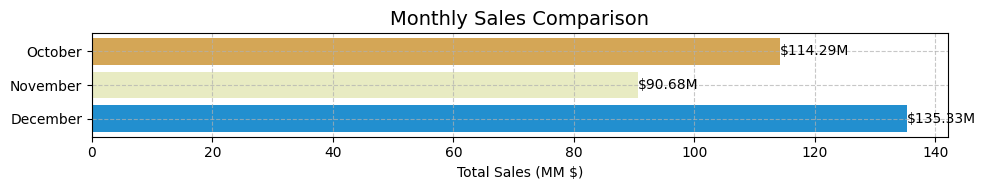

In [9]:
# Reverse the order of the index to have October at the top and December at the bottom
monthly_sales_reversed = monthly_sales.sort_index(ascending=False)

plt.figure(figsize=(10, 2))
bars = plt.barh(monthly_sales_reversed.index.strftime('%B'), 
                monthly_sales_reversed['Total Sales'] / 1e6, 
                color=current_color_scheme['colors'])

plt.title('Monthly Sales Comparison', fontsize=14)
plt.xlabel('Total Sales (MM $)', fontsize=10)

# Add the value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'${width:.2f}M', 
             ha='left', va='center')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
# Generate quarterly sales data
quarterly_sales = df.resample('Q')['Sales'].agg(['sum', 'mean', 'count'])
quarterly_sales.columns = ['Total Sales', 'Average Daily Sales', 'Number of Transactions']
quarterly_sales['Average Transaction Value'] = quarterly_sales['Total Sales'] / quarterly_sales['Number of Transactions']

print("Quarterly Sales Report:")
print(quarterly_sales.describe())

Quarterly Sales Report:
       Total Sales  Average Daily Sales  Number of Transactions  \
count          1.0             1.000000                     1.0   
mean   340302500.0         45013.558201                  7560.0   
std            NaN                  NaN                     NaN   
min    340302500.0         45013.558201                  7560.0   
25%    340302500.0         45013.558201                  7560.0   
50%    340302500.0         45013.558201                  7560.0   
75%    340302500.0         45013.558201                  7560.0   
max    340302500.0         45013.558201                  7560.0   

       Average Transaction Value  
count                   1.000000  
mean                45013.558201  
std                          NaN  
min                 45013.558201  
25%                 45013.558201  
50%                 45013.558201  
75%                 45013.558201  
max                 45013.558201  


Q4 2020 Performance Summary:
- Total sales: $340,302,500
- Average daily sales: $45,013.56
- Total transactions: 7,560
- Average transaction value: $45,013.56

These figures provide important benchmarks for comparing performance in subsequent quarters and years. The high average transaction value suggests that AAL deals with bulk orders or high-ticket items, typical in B2B or luxury retail contexts.

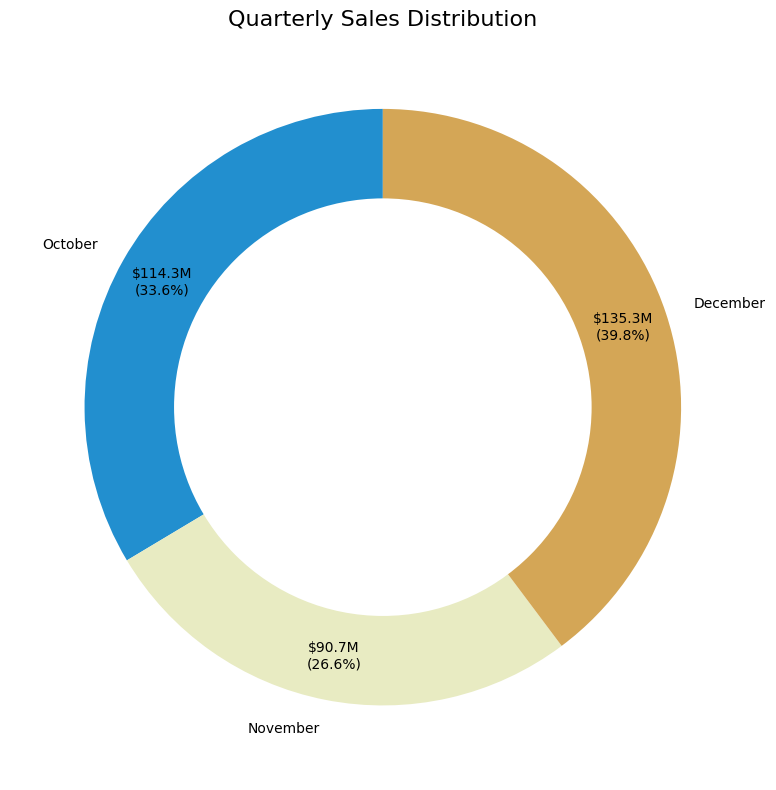

In [11]:
plt.figure(figsize=(8, 8))
centre_circle = plt.Circle((0,0),0.70,fc='white')

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'${val/1e6:.1f}M\n({pct:.1f}%)'
    return my_autopct

plt.pie(monthly_sales['Total Sales'], labels=monthly_sales.index.strftime('%B'), 
        colors=current_color_scheme['colors'], autopct=make_autopct(monthly_sales['Total Sales']),
        startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.5))

plt.title('Quarterly Sales Distribution', fontsize=16)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

## Customer Group Analysis

To gain a more nuanced understanding of sales patterns, I analyzed performance across four customer groups: Men, Women, Kids, and Seniors.

In [12]:
def group_performance_over_time(data, period):
    return data.groupby([pd.Grouper(freq=period), 'Group'])['Sales'].sum().unstack()

In [13]:
weekly_group_performance = group_performance_over_time(df, 'W')

print("Weekly Group Performance:")
print(weekly_group_performance)

Weekly Group Performance:
Group          Kids      Men  Seniors    Women
Date                                          
2020-10-04  3690000  3730000  3782500  3842500
2020-10-11  7020000  6807500  6737500  6437500
2020-10-18  6707500  6710000  6470000  6752500
2020-10-25  6525000  6872500  6757500  6660000
2020-11-01  5490000  5507500  5540000  5270000
2020-11-08  5125000  5335000  4962500  5442500
2020-11-15  5315000  5242500  5397500  5217500
2020-11-22  5302500  5025000  5200000  5585000
2020-11-29  5577500  5482500  5302500  5115000
2020-12-06  7362500  7505000  7217500  7537500
2020-12-13  8030000  7802500  7805000  7887500
2020-12-20  7765000  7990000  7772500  8127500
2020-12-27  7630000  8337500  7685000  8117500
2021-01-03  3532500  3402500  3407500  3450000


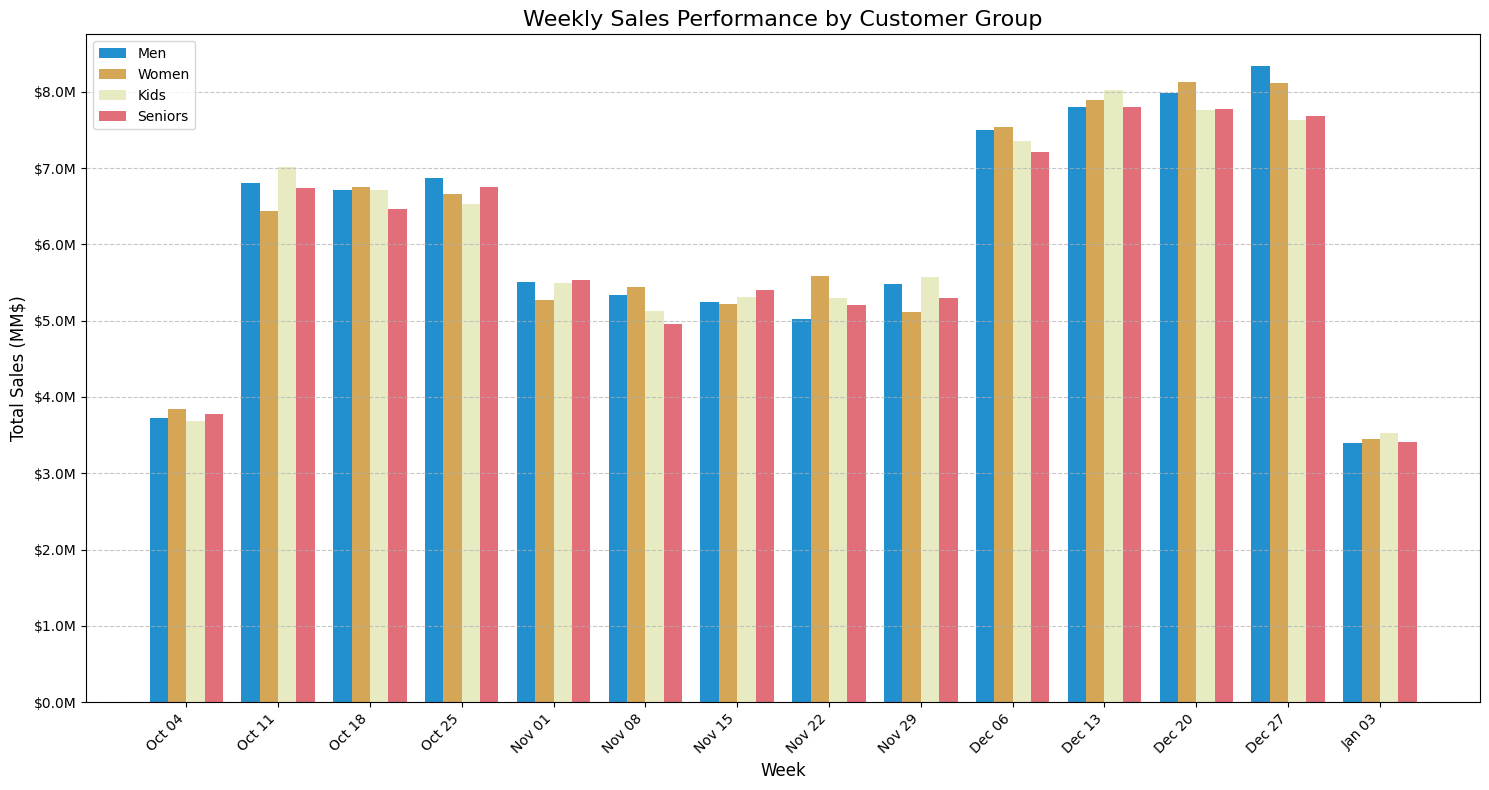

In [14]:
import matplotlib.dates as mdates

# Ensure the index is datetime
weekly_group_performance.index = pd.to_datetime(weekly_group_performance.index)

# Set up the plot
fig, ax = plt.subplots(figsize=(15, 8))

# Set the width of each bar group
width = 0.2

# Set up the x-axis
x = np.arange(len(weekly_group_performance.index))

# Plot bars for each group in the specified order
ax.bar(x - width*1.5, weekly_group_performance['Men'] / 1e6, width, label='Men', color=current_color_scheme['colors'][0])
ax.bar(x - width/2, weekly_group_performance['Women'] / 1e6, width, label='Women', color=current_color_scheme['colors'][2])
ax.bar(x + width/2, weekly_group_performance['Kids'] / 1e6, width, label='Kids', color=current_color_scheme['colors'][1])
ax.bar(x + width*1.5, weekly_group_performance['Seniors'] / 1e6, width, label='Seniors', color=current_color_scheme['colors'][3])

# Customize the plot
ax.set_title('Weekly Sales Performance by Customer Group', fontsize=16)
ax.set_xlabel('Week', fontsize=12)
ax.set_ylabel('Total Sales (MM$)', fontsize=12)
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Format x-axis to show dates as Month Day
ax.set_xticks(x)
ax.set_xticklabels(weekly_group_performance.index.strftime('%b %d'), rotation=45, ha='right')

# Format y-axis to show sales in the proper format
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.1f}M'))

plt.tight_layout()
plt.show()

Weekly analysis reveals:
1. All groups show similar seasonal patterns, with peaks in mid-December.
2. Women's category often leads in sales, especially during peak weeks.
3. Men's sales show strong performance, particularly in late December.
4. Kids' sales see notable increases during holiday weeks.
5. Seniors' sales remain relatively stable but also increase during peak periods.

In [15]:
monthly_group_performance = group_performance_over_time(df, 'M')

print("\nMonthly Group Performance:")
print(monthly_group_performance)


Monthly Group Performance:
Group           Kids       Men   Seniors     Women
Date                                              
2020-10-31  28635000  28885000  28565000  28205000
2020-11-30  22882500  22615000  22322500  22862500
2020-12-31  33555000  34250000  33150000  34375000


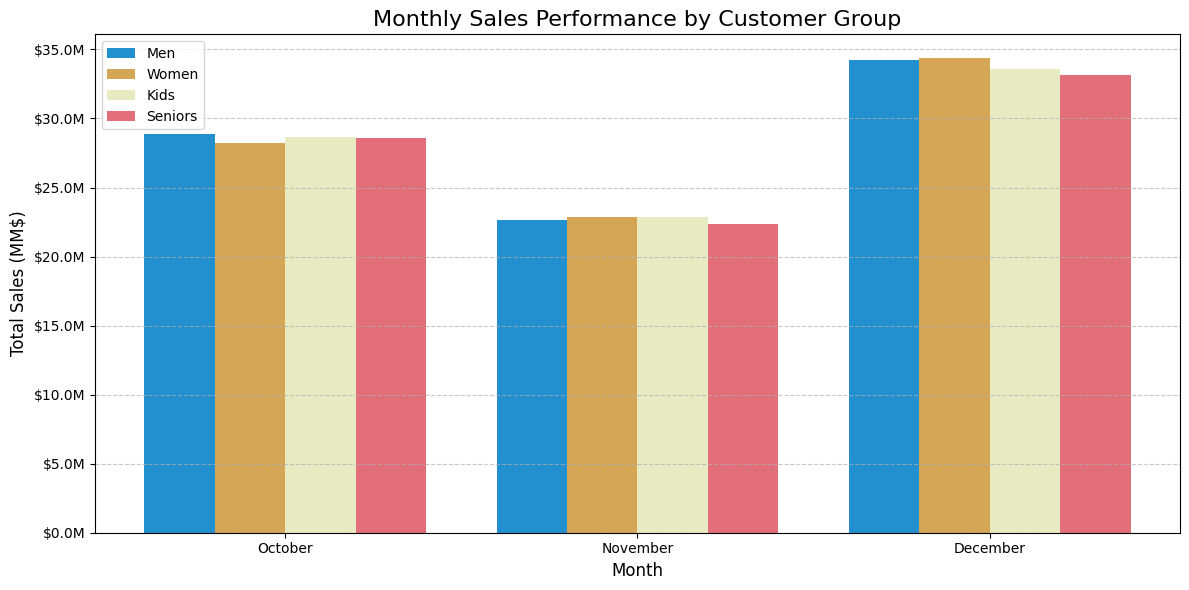

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure the index is datetime
monthly_group_performance.index = pd.to_datetime(monthly_group_performance.index)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of each bar group
width = 0.2

# Set up the x-axis
x = np.arange(len(monthly_group_performance.index))

# Plot bars for each group in the specified order
ax.bar(x - width*1.5, monthly_group_performance['Men'] / 1e6, width, label='Men', color=current_color_scheme['colors'][0])
ax.bar(x - width/2, monthly_group_performance['Women'] / 1e6, width, label='Women', color=current_color_scheme['colors'][2])
ax.bar(x + width/2, monthly_group_performance['Kids'] / 1e6, width, label='Kids', color=current_color_scheme['colors'][1])
ax.bar(x + width*1.5, monthly_group_performance['Seniors'] / 1e6, width, label='Seniors', color=current_color_scheme['colors'][3])

# Customize the plot
ax.set_title('Monthly Sales Performance by Customer Group', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Total Sales (MM$)', fontsize=12)
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Format x-axis to show month names
ax.set_xticks(x)
ax.set_xticklabels(monthly_group_performance.index.strftime('%B'), rotation=0)

# Format y-axis to show sales in the format '$30.0M'
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.1f}M'))

plt.tight_layout()
plt.show()

Monthly insights:
- December is the highest sales month for all groups, with Women's category leading slightly.
- All groups experience a sales dip in November.
- Women's and Men's categories consistently outperform Kids and Seniors, with the gap widening in December.

In [17]:
quarterly_group_performance = group_performance_over_time(df, 'Q')

print("\nQuarterly Group Performance:")
print(quarterly_group_performance)


Quarterly Group Performance:
Group           Kids       Men   Seniors     Women
Date                                              
2020-12-31  85072500  85750000  84037500  85442500


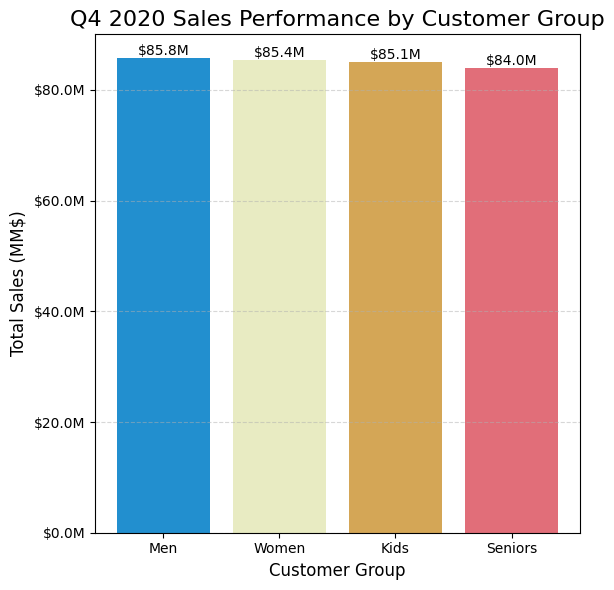

In [18]:
import matplotlib.pyplot as plt

# Extract the data for Q4 2020
q4_data = quarterly_group_performance.iloc[0]

# Reorder the data
q4_data_ordered = q4_data[['Men', 'Women', 'Kids', 'Seniors']]

# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot bars for each group
bars = ax.bar(q4_data_ordered.index, q4_data_ordered.values / 1e6, color=current_color_scheme['colors'])

# Customize the plot
ax.set_title('Q4 2020 Sales Performance by Customer Group', fontsize=16)
ax.set_xlabel('Customer Group', fontsize=12)
ax.set_ylabel('Total Sales (MM$)', fontsize=12)
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Format y-axis to show sales in the format '$85.0M'
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.1f}M'))

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:.1f}M',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

Q4 Group Performance:
1. Men: $85.8M (25.2%)
2. Women: $85.4M (25.1%)
3. Kids: $85.1M (25.0%)
4. Seniors: $84.0M (24.7%)

The relatively balanced performance across groups suggests that AAL's current strategies are effectively targeting each segment. However, there's potential for growth in the Kids and Seniors categories.

## Strategic Implications

Based on this comprehensive analysis, several strategic recommendations emerge:

1. Inventory Management: 
   - Adjust stock levels based on monthly trends and group performance.
   - Ensure ample inventory for December across all groups.
   - Maintain sufficient stock for October's strong sales.

2. Marketing Strategies:
   - Develop group-specific holiday promotions to capitalize on December's sales surge.
   - Create targeted campaigns to boost November sales across all groups.
   - Focus on cross-selling opportunities between groups, especially using strong performers (Men's and Women's) to drive sales in other categories.

3. Capacity Planning: 
   - Evaluate the potential for increasing transaction volume, especially during peak periods.
   - Consider ways to handle more transactions if currently at capacity.

4. Customer Analysis: 
   - Conduct deeper analysis of high-value customers to understand and cater to their needs.
   - Develop strategies to increase the average transaction value, particularly in slower months.

5. Year-Round Planning: 
   - While focusing on the holiday season is crucial, develop strategies for more balanced sales throughout the quarter.
   - Analyze factors contributing to October's strong performance for potential application in other months.

## Conclusion

This analysis provides a comprehensive view of AAL's Q4 2020 sales performance, highlighting key trends across time periods and customer groups. By leveraging these insights, AAL can optimize its operations, target its marketing efforts more effectively, and potentially increase sales during slower periods.

The findings demonstrate the value of data-driven decision making in retail strategy. Future analyses could explore product-level performance, geographical variations, and customer loyalty patterns to further refine AAL's strategies and drive growth.